_Reading this on GitHub? [Check out the README in this folder (`/notebooks`)][README]
for instructions on how to run this notebook using the Advanced Analytics Workspace!_

# ESTMA Payments by Entity and Payment Type

[README]: https://github.com/StatCan/hackathon-ginyu-force-data/tree/main/notebooks#running-these-notebooks-on-aaw

In [1]:
import pandas as pd
import plotly.graph_objects as go


In [2]:
df = pd.read_csv(
    "https://github.com/StatCan/hackathon-ginyu-force-data/raw/main/estma-payments.csv")
entity_list = sorted(df['entity'].unique())
payment_list = df['payment_category'].unique()
df.set_index("entity", inplace=True)


In [3]:
def entity(entity_name):
    e = df.loc[[entity_name],
               ['reporting_cycle',
                'payment_category',
                'amount_reported_cad']]
    d = e.groupby(["reporting_cycle", "payment_category"])[
        "amount_reported_cad"].sum()
    data_frame = d.to_frame().reset_index()
    return data_frame


entity('Rochester Resources Ltd.')


,reporting_cycle,payment_category,amount_reported_cad
0,2016,Fees,439039.68
1,2016,Taxes,932857.36
2,2017,Fees,95736.00
3,2017,Taxes,1009594.00
4,2018,Fees,438822.00
5,2018,Taxes,1095342.00
6,2019,Fees,300202.00
7,2019,Taxes,1109606.00


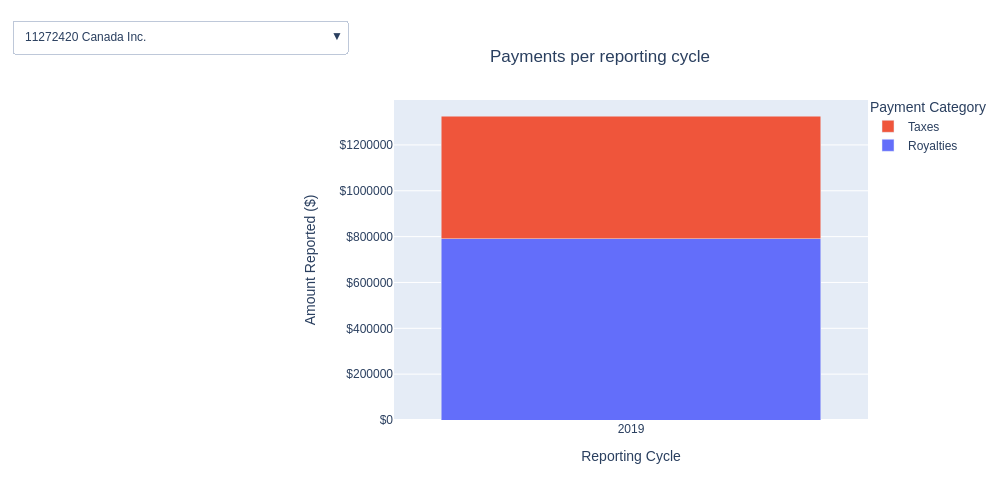

In [9]:
def entity(entity_name):
    e = df.loc[[entity_name], ['reporting_cycle',
                               'payment_category', 'amount_reported_cad']]
    d = e.groupby(["reporting_cycle", "payment_category"])[
        "amount_reported_cad"].sum()
    data_frame = d.to_frame().reset_index()
    return data_frame


fig = go.Figure()
default_state = entity_list[0]
region_plot_names = []
buttons = []
for e in entity_list:
    d = entity(e)
    payment_types = d['payment_category'].unique()
    for name in payment_types:
        frame = d.loc[d['payment_category'] == name]
        fig.add_trace(go.Bar(name=name, x=frame['reporting_cycle'],
                      y=frame['amount_reported_cad'], visible=(e == default_state)))
    region_plot_names.extend([e] * len(payment_types))

for entity in entity_list:
    buttons.append(dict(method='update',
                        label=entity,
                        args=[{'visible': [entity == r for r in region_plot_names]}]))


fig.update_layout(showlegend=True,
                  yaxis_tickprefix='$',
                  yaxis_tickformat=',.',
                  legend_title="Payment Category",
                  title={
                      'text': "Payments per reporting cycle",
                      'y': 0.9,
                      'x': 0.6,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                  yaxis_title="Amount Reported ($)",
                  xaxis_title="Reporting Cycle",
                  updatemenus=[{
                      "buttons": buttons,
                      "direction": "down",
                      "active": list(entity_list).index(default_state),
                      "showactive": True,
                      "x": -0.10,
                      "y": 1.25}])

fig.update_layout(legend=dict(
    orientation="v",
    y=1.02,
    x=1.00
))

fig.update_yaxes(autorange=True)
fig.update_layout(barmode='stack')
fig.update_xaxes(type='category')
fig.show()
